In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('/home/siva/Downloads/py-master/ML/16_regularization/Melbourne_housing_FULL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [3]:
df.dropna(subset=['Price'],inplace=True,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longtitude 

In [4]:
df1=df.drop(['Landsize','YearBuilt','BuildingArea','Lattitude',\
             'Longtitude','Car','Date','Rooms'],axis=1)
df1.dropna(subset=['Distance','Postcode','CouncilArea','Regionname',\
                   'Propertycount'],axis=0,inplace=True)
df1.reset_index(drop=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27244 entries, 1 to 34856
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27244 non-null  object 
 1   Address        27244 non-null  object 
 2   Type           27244 non-null  object 
 3   Price          27244 non-null  float64
 4   Method         27244 non-null  object 
 5   SellerG        27244 non-null  object 
 6   Distance       27244 non-null  float64
 7   Postcode       27244 non-null  float64
 8   Bedroom2       20806 non-null  float64
 9   Bathroom       20800 non-null  float64
 10  CouncilArea    27244 non-null  object 
 11  Regionname     27244 non-null  object 
 12  Propertycount  27244 non-null  float64
dtypes: float64(6), object(7)
memory usage: 2.9+ MB


In [5]:
df1['Bedroom2'].fillna(df1['Bedroom2'].median(),inplace=True)
df1['Bathroom'].fillna(df1['Bathroom'].median(),inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27244 entries, 1 to 34856
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27244 non-null  object 
 1   Address        27244 non-null  object 
 2   Type           27244 non-null  object 
 3   Price          27244 non-null  float64
 4   Method         27244 non-null  object 
 5   SellerG        27244 non-null  object 
 6   Distance       27244 non-null  float64
 7   Postcode       27244 non-null  float64
 8   Bedroom2       27244 non-null  float64
 9   Bathroom       27244 non-null  float64
 10  CouncilArea    27244 non-null  object 
 11  Regionname     27244 non-null  object 
 12  Propertycount  27244 non-null  float64
dtypes: float64(6), object(7)
memory usage: 2.9+ MB


In [6]:
df1

,Suburb,Address,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,CouncilArea,Regionname,Propertycount
1,Abbotsford,85 Turner St,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,h,1480000.0,PI,Jas,6.3,3013.0,4.0,1.0,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,h,888000.0,SP,Sweeney,6.3,3013.0,2.0,2.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,t,705000.0,S,Jas,6.3,3013.0,2.0,1.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,h,1140000.0,SP,hockingstuart,6.3,3013.0,3.0,1.0,Maribyrnong City Council,Western Metropolitan,6543.0


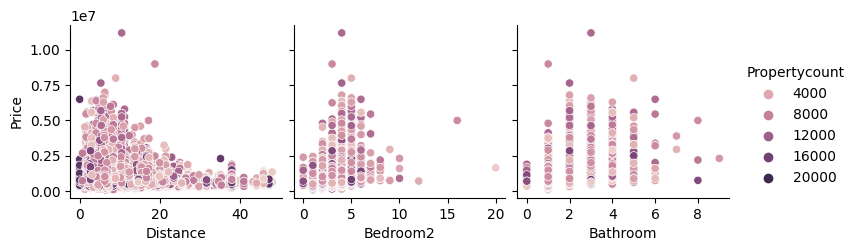

In [7]:
X=['Distance','Bedroom2','Bathroom']
sns.pairplot(data=df,x_vars=X,y_vars=['Price'],hue='Propertycount')

In [ ]:
ohe=OneHotEncoder(drop='first')
encoded_columns=ohe.fit_transform(df[['Suburb','Address','Type','Method',\
                'SellerG','Postcode','CouncilArea','Regionname']])
df_encoded=pd.DataFrame(encoded_columns.toarray(),\
                        columns=ohe.get_feature_names_out())
df_encoded